In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
df=pd.read_csv('/content/drive/MyDrive/ML/ML Project/archive (18)/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [14]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [16]:
df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [17]:
categorical_columns =['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']
df=pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [18]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
df['Age']=scaler.fit_transform(df[['Age']])
df['DailyRate']=scaler.fit_transform(df[['DailyRate']])
df['DistanceFromHome']=scaler.fit_transform(df[['DistanceFromHome']])


### EDA - Exploratory Data Analysis


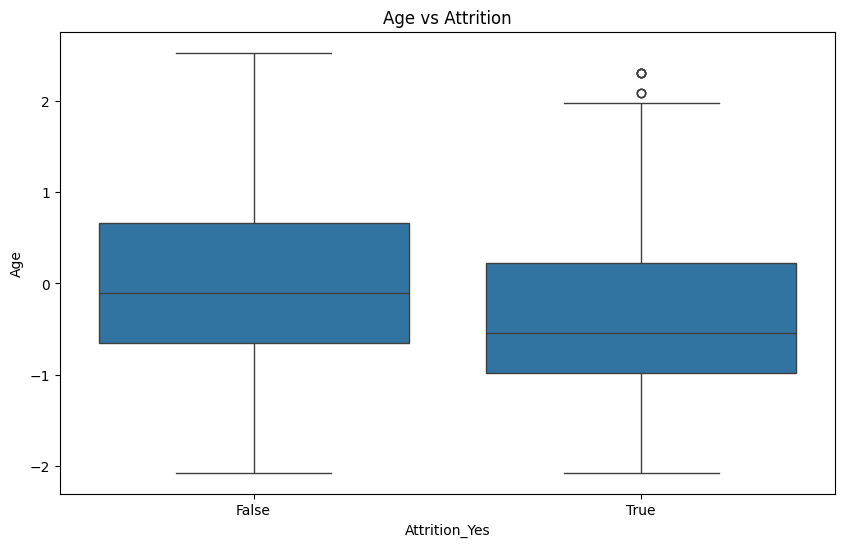

In [19]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Attrition_Yes', y='Age', data=df)
plt.title('Age vs Attrition')
plt.show()

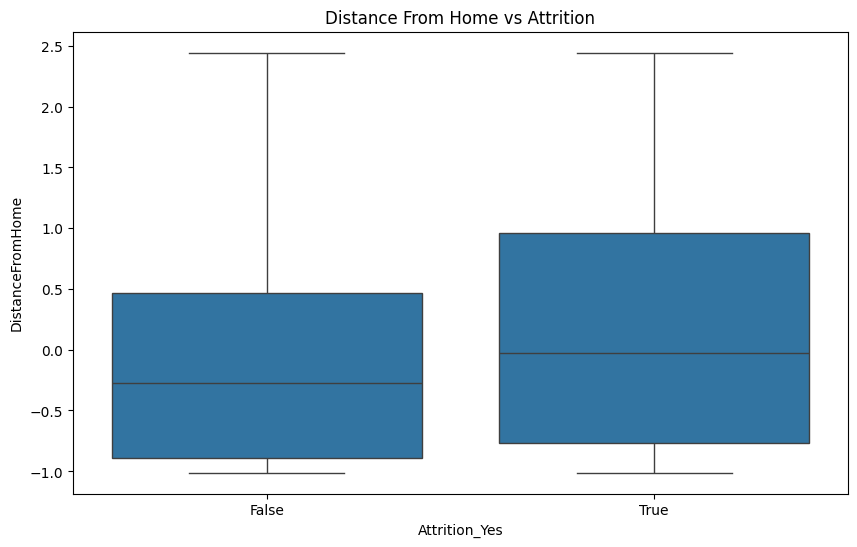

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Attrition_Yes', y='DistanceFromHome', data=df)
plt.title('Distance From Home vs Attrition')
plt.show()

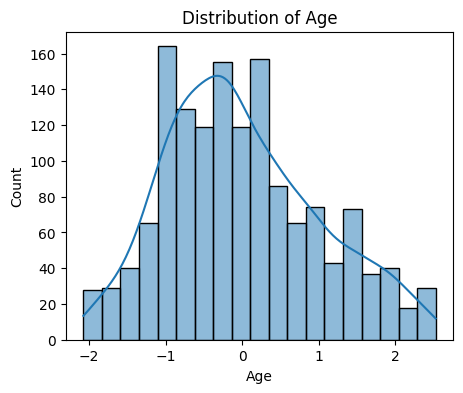

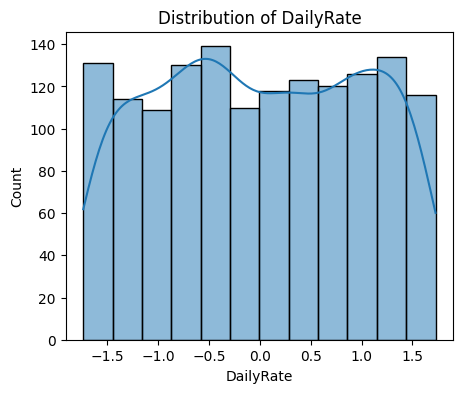

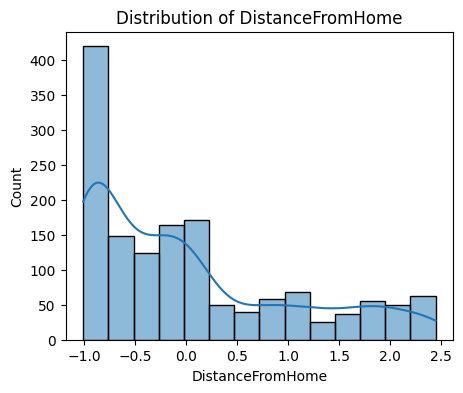

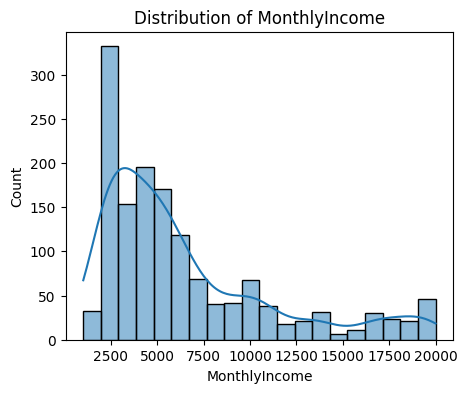

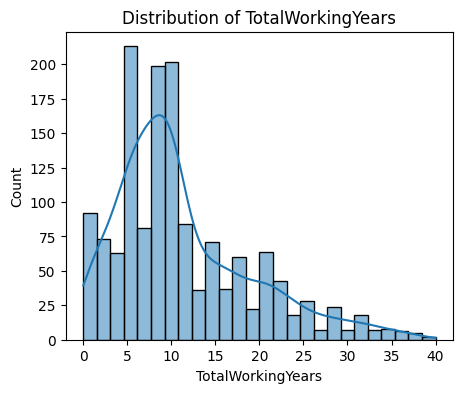

In [24]:
numerical_features = ['Age', 'DailyRate', 'DistanceFromHome', 'MonthlyIncome', 'TotalWorkingYears']
for feature in numerical_features:
    plt.figure(figsize=(5, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

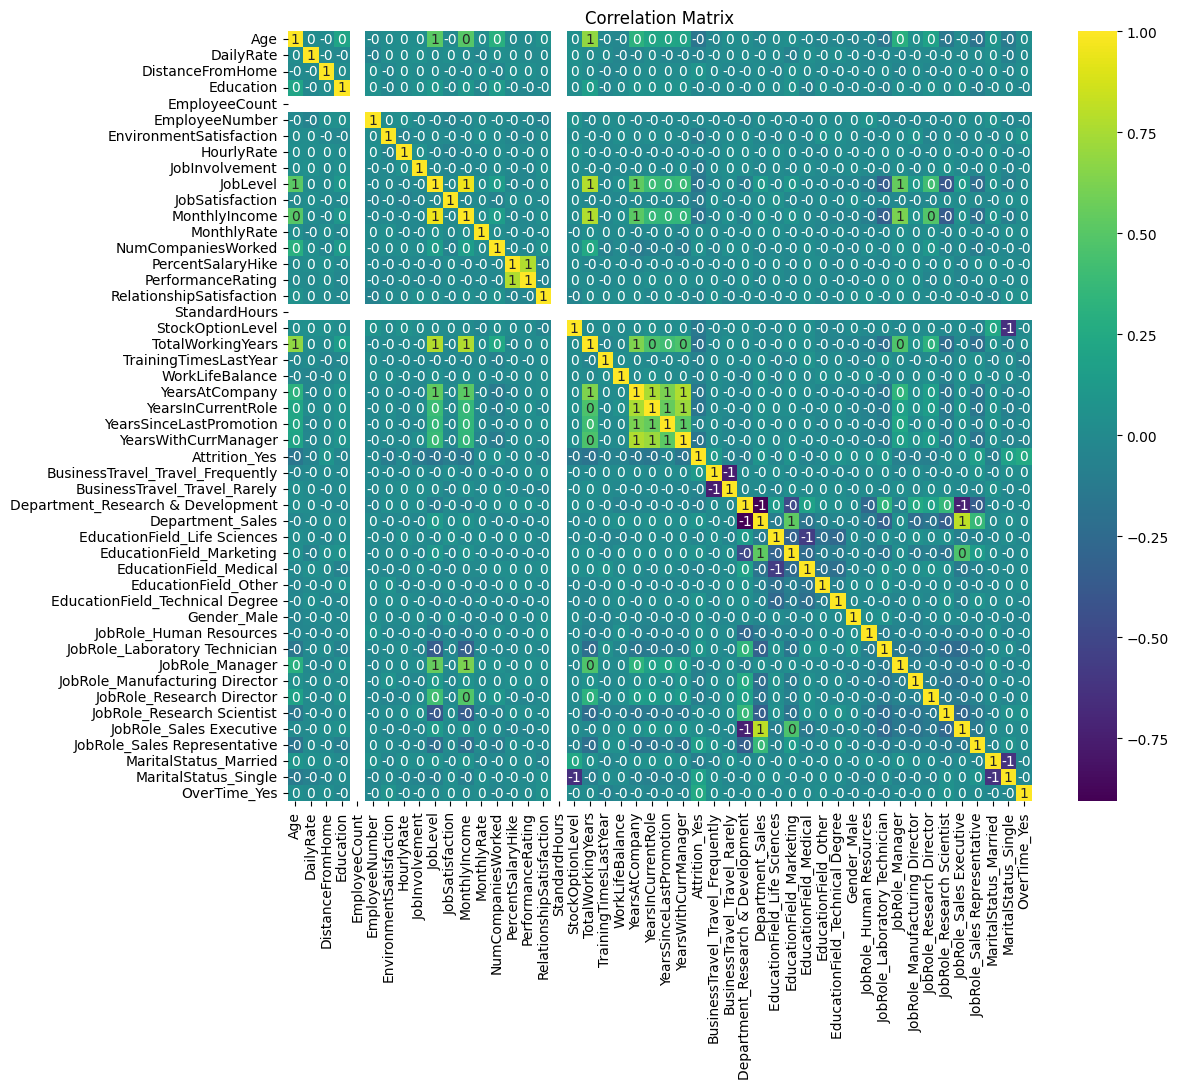

In [27]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt=".0f")
plt.title('Correlation Matrix')
plt.show()

In [28]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [31]:
X = df.drop('Attrition_Yes', axis=1)
y = df['Attrition_Yes']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate
print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))


Random Forest:
Accuracy: 0.8775510204081632
Precision: 0.8
Recall: 0.10256410256410256
F1-score: 0.18181818181818182


In [35]:
cross_val_score_rf = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
print("\nRandom Forest Cross-Validation Scores:", cross_val_score_rf)
print("Mean Accuracy:", cross_val_score_rf.mean())


Random Forest Cross-Validation Scores: [0.8537415  0.86054422 0.87414966 0.85034014 0.86054422]
Mean Accuracy: 0.8598639455782312


### Insights from EDA

  Age and Attrition: Younger employees tend to have a slightly higher attrition rate based on the box plot. This suggests that early-career employees might be more likely to leave.

  Distance From Home: Employees who live farther from the workplace tend to have a higher attrition rate. This indicates that commute distance could be a contributing factor.

  Numerical Features: The distribution plots of numerical features like MonthlyIncome and TotalWorkingYears might reveal patterns related to attrition. For example, lower income or fewer years of experience could be associated with higher attrition.

  Correlation: The correlation matrix helps identify relationships between features and attrition. Look for variables with stronger correlations (positive or negative) with Attrition_Yes.

### Recommendation

1.Retention Strategies for High-Risk Groups:

  Younger Employees: Offer career development opportunities, mentorship programs, and competitive compensation to retain early-career talent.

  Employees with Long Commutes: Consider flexible work arrangements, remote work options, or transportation assistance to reduce the burden of commute distance.

2.Address Key Drivers of Attrition:

  Compensation and Benefits: Review salary and benefits packages to ensure they are competitive within the industry.

  Work-Life Balance: Promote flexible work schedules, paid time off, and employee well-being programs.

  Career Development: Provide opportunities for training, skill development, and career advancement.

  Management and Leadership: Train managers to create a positive and supportive work environment, address employee concerns, and provide regular feedback.

3.Targeted Interventions:

  Use the model's predictions to identify employees at high risk of attrition and proactively engage with them to address their concerns and improve their experience.

4.Monitor and Evaluate:

  Continuously track attrition rates and monitor the effectiveness of implemented strategies. Adjust your approach as needed to achieve optimal retention.